In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ds=pd.read_csv("https://bit.ly/w-data")
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

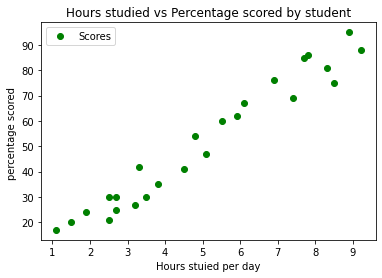

In [11]:
ds.plot(x='Hours',y='Scores',style='go')
plt.title("Hours studied vs Percentage scored by student")
plt.xlabel("Hours stuied per day")
plt.ylabel("percentage scored ")
plt.show()

In [13]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,1].values

In [14]:
print("dataset :\n",ds)
print("x is :\n" ,x)
print("y is :/n",y)

dataset :
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
x is :
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y is :/n [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [15]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
len(xTrain)

20

In [17]:
len(xTest)

5

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xTrain,yTrain)
print("Training done.")

Training done.


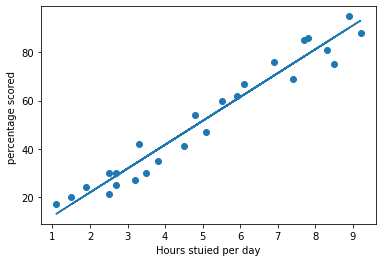

In [21]:
yLine=(reg.coef_)*x + reg.intercept_
plt.scatter(x,y)
plt.plot(x,yLine)
plt.xlabel("Hours stuied per day")
plt.ylabel("percentage scored ")
plt.show()


In [22]:
yPred=reg.predict(xTest)
df=pd.DataFrame({'Hours': xTest.reshape(1,-1)[0],'Predicted score':yPred,'Actual score':yTest})
df

,Hours,Predicted score,Actual score
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


In [25]:
HoursStudied =9.25
predictedScore =reg.predict ([[HoursStudied]])
print("The predicted score for student who studies for 9.5 hr a day is :",predictedScore[0])

The predicted score for student who studies for 9.5 hr a day is : 93.69173248737538


In [26]:
from sklearn import metrics 
metrics.mean_absolute_error(yTest,yPred)

4.183859899002975

In [27]:
reg.score(xTest,yTest)

0.9454906892105356